# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Guzga Adrian-Dumitru - __[adrian-dumitru.guzga@ulb.be](mailto:adrian-dumitru.guzga@ulb.be) - Student ID 460513__
### Martis William - __[william.martis@ulb.be](william.martis@ulb.be) - Student ID 441157__
### Schmidt Xavier - __[xavier.schmidt@ulb.be](xavier.schmidt@ulb.be) - Student ID 445723__

### Video presentation: www.youtube.com/doge_shiba_cummies_to_the_moon


# Predicting the functional status of water pumps in Tanzania


# Introduction


The largest country in East Africa, with no less than 60 million inhabitants, has been facing a major social problem for years. According to the Tanazanian ministry of water, more than 47% of its inhabitants do not have access to drinking water. Despite numereous financial aids from other countries and organizations, the Tanzanian government is unable to provide concrete solution to this social crisis. A large part of the water pumps present on the territory are not functional or need repaire work. This issues forcing the inhabitants of the country to walk several kilometers to reach the nearest functional pum and/or forcing them to drink non-drinking and foul water.

The main objective of this project is therefore to predict the functionality of the water pumps based on data provided by the Taarifa website and the Tanzanian ministry.

The present work will be divided into three parts: The first one being the implementation of a pipeline for the preprocessing of the data and the feature selection. The second part includes the implementation and the performance testing of three machine learning models on the training set, namely: a RandomForest model, a Neural Network model and a Support Vector Machine model. Finally, the last part of this project will include the implementation and the performance assessment of a deep neural network.

# Data preprocessing

In [ ]:
install.packages('dummies')

library(rlang)
library(dummies)
#library(stringdist)
#library(dplyr)
#library(randomForest)
#library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

dummies-1.5.6 provided by Decision Patterns




In [ ]:
df <- read.csv("training_data.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",")
df_labels <- read.csv("training_labels.csv", stringsAsFactors=F, header = TRUE, strip.white = TRUE, sep = ",")

A quick view on the numbers of functional, non-functional or pumps that require repair work sshows that there are around 37% of water pumps that non-functional, whereas around 7.5% of them are functional but need repairs. The rest of 55% of the water pumps in the dataset are fully functional.

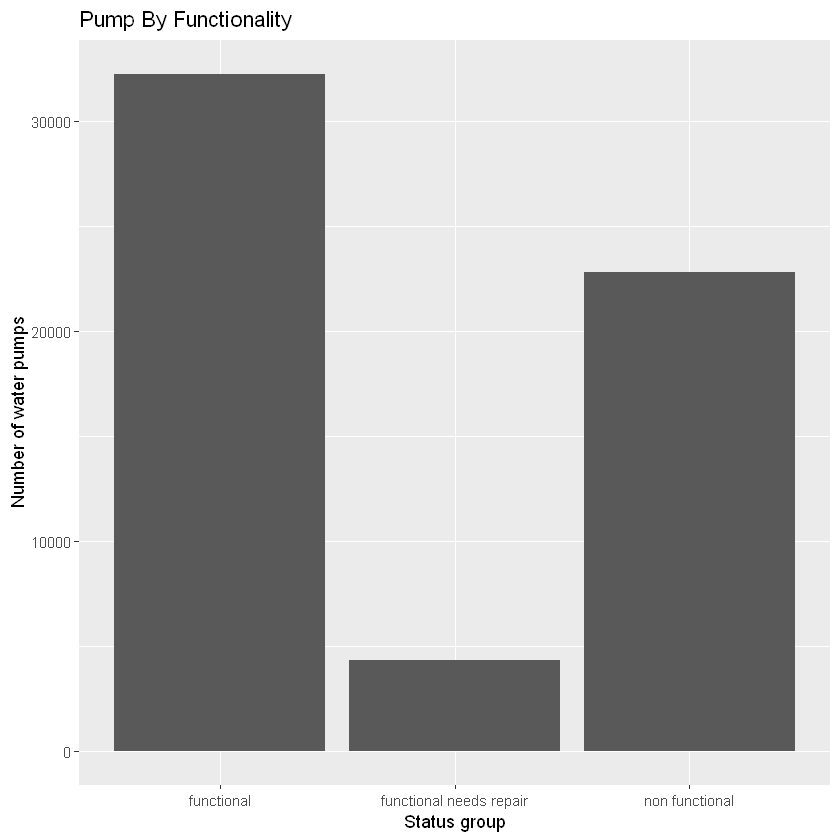

In [ ]:
#A quick view on the numbers of functional, non-functional or pumps that require repaire work.

labels<-c(df_labels$status_group)
ggplot(data.frame(labels), aes(x=labels))+ geom_bar()+labs(title="Pump By Functionality",
                                                           y="Number of water pumps", 
                                                           x="Status group")

To reduce the number of unique categorical values each categorical feature can take, we transformed all these variables to lowercase.

In [ ]:
lowercase_all = function(df) {
    for(column in names(df)) {
        columnClass = class(df[,column])
        if(columnClass == "factor") {
            df[,column] <<- tolower(df[,column])
        }
    }
}

In [ ]:
lowercase_all(df)

## Features

We give a simple summary of the dataset before diving into more details concerning the features of the dataset. Here, we can observe that there are features representing dates, geographical coordinates, codes for certain geographical locations, strings representing the installers of a waterpump or specific characteristics of waterpumps.

In [ ]:
str(df)

'data.frame':	59400 obs. of  40 variables:
 $ id                   : int  69572 8776 34310 67743 19728 9944 19816 54551 53934 46144 ...
 $ amount_tsh           : num  6000 0 25 0 0 20 0 0 0 0 ...
 $ date_recorded        : chr  "14/03/2011" "06/03/2013" "25/02/2013" "28/01/2013" ...
 $ funder               : chr  "roman" "grumeti" "lottery club" "unicef" ...
 $ gps_height           : int  1390 1399 686 263 0 0 0 0 0 0 ...
 $ installer            : chr  "roman" "grumeti" "world vision" "unicef" ...
 $ longitude            : num  34.9 34.7 37.5 38.5 31.1 ...
 $ latitude             : num  -9.86 -2.15 -3.82 -11.16 -1.83 ...
 $ wpt_name             : chr  "none" "zahanati" "kwa mahundi" "zahanati ya nanyumbu" ...
 $ num_private          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ basin                : chr  "lake nyasa" "lake victoria" "pangani" "ruvuma / southern coast" ...
 $ subvillage           : chr  "mnyusi b" "nyamara" "majengo" "mahakamani" ...
 $ region               : chr  "iringa" "mara" "

In [ ]:
categorical_features<-which(sapply(df[1,],class)=="character"|sapply(df[1,],class)=="factor"|sapply(df[1,],class)=="logical")
df_numeric<-df[,-categorical_features]

summary(df_numeric)

The feature amount_tsh (amount of water available to waterpoint) contains a significant quantity of invalid data values represented by 0. Out of 59,400 records, 41,639 of them have a null value, which represents approximatively 70% of the observations.


In [ ]:
summary(df$amount_tsh)

test = as.data.frame(table(df$amount_tsh))
test[order(-test$Freq),]
dim(test)

In [ ]:
# GPS_Height contains a significant quantity of invalid data values represented by 0 and negative numbers.
# Out of 59,400 records, 20438 of them have a null value, which represents approximatively 35% of the observations.


summary(df$gps_height)

test = as.data.frame(table(df$gps_height))
test[order(-test$Freq),]
dim(test)

In [ ]:
# Num_private contains a significant quantity of invalid data values represented by 0.
# Out of 59,400 records, 58,643 of them have a null value, which represents approximatively 99% of the observations.


summary(df$num_private)

test = as.data.frame(table(df$num_private))
test[order(-test$Freq),]
dim(test)

In [ ]:
# Region_code has a total of 27 different outputs with no 0/NA value. 
test = as.data.frame(table(df$region_code))
test[order(-test$Freq),]
dim(test)

In [ ]:
# District has a total of 20 different outputs.
test = as.data.frame(table(df$district_code))
test[order(-test$Freq),]
dim(test)

In [ ]:
# Population contains a significant quantity of invalid data values represented by 0.
# Out of 59,400 records, 21381 of them have a null value, which represents approximatively 35% of the observations.
# The second value with the highest frequence is "1" - which appears to be an invalid value while talking about human population in the area surrounding a water pump. 
# 

summary(df$population)
hist(df$population)

test = as.data.frame(table(df$population))
test[order(-test$Freq),]
dim(test)



summary(df$population[df$population>0])
df_pop<- df$population[df$population>1]
hist(df_pop)

In [ ]:
#Construction_years contains a significant quantity of invalid/incomplete data represented by 0.
# Out of 59,400 records, 20709 of them have a null value, which represents approximatively 35% of the observations.
# Valid values are between 1960 - 2013


test = as.data.frame(table(df$construction_year))
test[order(-test$Freq),]
dim(test)

df_year<- df$construction_year[df$construction_year > 0]
hist(df_year)

In [ ]:
#install.packages('corrplot')
#library(corrplot)
mcor<-cor(df_numeric)
mcor

corrplot(mcor, type="upper", order="hclust", tl.col="black", tl.srt=45)

In [ ]:
#categorical features

str(df[,categorical_features])

In [ ]:

test = as.data.frame(table(df$funder))
test[order(-test$Freq),]
dim(test)



In [ ]:
test = as.data.frame(table(df$installer))
test[order(-test$Freq),]
dim(test)



In [ ]:
test = as.data.frame(table(df$wpt_name))
test[order(-test$Freq),]
dim(test)



In [ ]:
test = as.data.frame(table(df$subvillage))
#test[order(-test$Freq),]
dim(test)
test = as.matrix(test)
#hist(test)
test


[1] 19288     2

Var1,Freq
,371
'a' kati,1
##,1
1,132
14kambalage,5
18,1
19,3
20,1
22b,1
23b,1


In [ ]:
test = as.data.frame(table(df$region))
test[order(-test$Freq),]
dim(test)



In [ ]:
test = as.data.frame(table(df$lga))
test[order(-test$Freq),]
dim(test)




In [ ]:
test = as.data.frame(table(df$ward))
test[order(-test$Freq),]
dim(test)




In [ ]:
test = as.data.frame(table(df$public_meeting))
test[order(-test$Freq),]
dim(test)


In [ ]:
test = as.data.frame(table(df$scheme_management))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$scheme_name))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$permit))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$extraction_type))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$extraction_type_group))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$extraction_type_class))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$management_group))
test[order(-test$Freq),]
dim(test)



In [ ]:
test = as.data.frame(table(df$management))
test[order(-test$Freq),]
dim(test)




[1] 7 2

Var1,Freq
<fct>,<int>
never pay,25348
other,1054
pay annually,3642
pay monthly,8300
pay per bucket,8985
pay when scheme fails,3914
unknown,8157


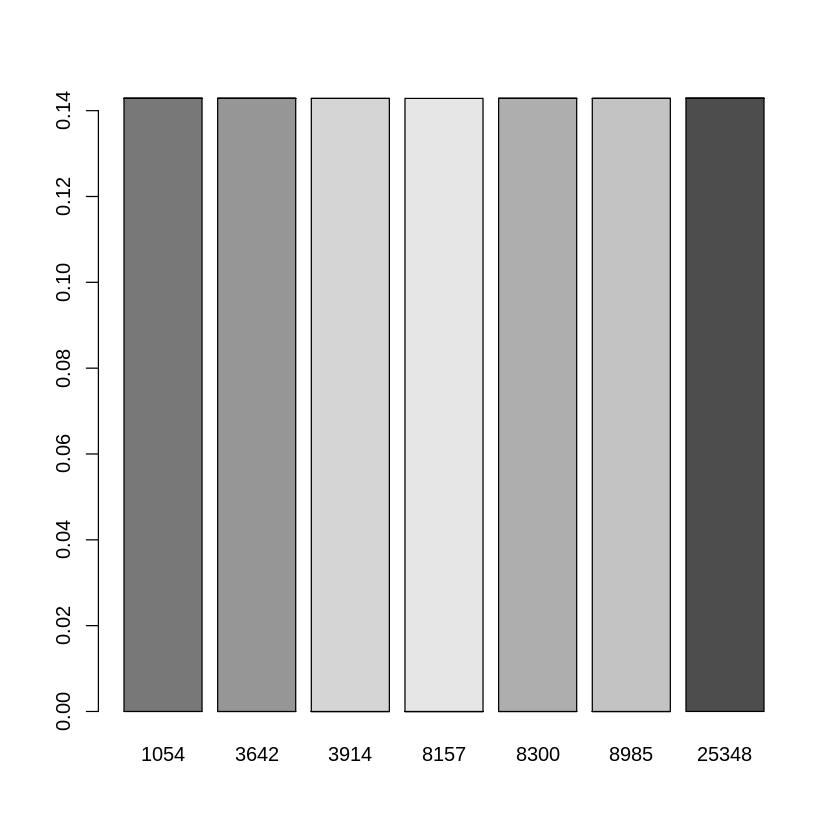

In [ ]:
test = as.data.frame(table(df$payment))
#test = test[order(-test$Freq),]
dim(test)
#test = as.matrix(test)
test
barplot(prop.table(table(test)))

In [ ]:
test = as.data.frame(table(df$payment_type))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$water_quality))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$quality_group))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$quantity))
test[order(-test$Freq),]
dim(test)




In [ ]:
test = as.data.frame(table(df$quantity_group))
test[order(-test$Freq),]
dim(test)




In [ ]:
test = as.data.frame(table(df$source))
test[order(-test$Freq),]
dim(test)



In [ ]:
test = as.data.frame(table(df$source_type))
test[order(-test$Freq),]
dim(test)



In [ ]:
test = as.data.frame(table(df$source_class))
test[order(-test$Freq),]
dim(test)



In [ ]:
test = as.data.frame(table(df$waterpoint_type))
test[order(-test$Freq),]
dim(test)

In [ ]:
test = as.data.frame(table(df$waterpoint_type_group))
test[order(-test$Freq),]
dim(test)


## Cleaning data

After having analysed each initial feature of the dataset, we have observed that some categorical features had plenty of values that were either empty strings or did not make sense at all, such as as a zero or a simple dash in the column of installers of the dataframe. Additionally, some of the values were simply empty strings, that were read as such from the *csv* file, as well as some values that were just "unknown". Thus, because of the way in which we perform our missing value imputation, we have chosen to attribute a NA value to the entries' columns containing such wrongfully entered values.

### Geographical position of waterpumps

Because of how many faults we have found in the dataset, mispelled funders and installers, incomplete names etc, we could not rule out the possibility that some of the waterpumps would not actually be in Tanzania. In order to test our presumption, and act accordingly, we had to define an area represented by a square region containing Tanzania, represented by 2 points on Earth (longitude and latitude coordinates of upper right corner and lower left corner of the square), and check that each entry in the dataset actually belongs to that area. If it is the case, the corresponding entries will be kept, otherwise, they will be deleted from the dataset's corresponding dataframe. This has led to the identification and suppression of roughly 1500 entries in the dataset, which translates to 2.5% of it. 

In [ ]:
#filter long/lat
x_up_right = 0.022
y_up_right = 40.729
x_down_left = -12.729
y_down_left = 28.138

df <- df[c(df$latitude > x_down_left & df$latitude < x_up_right & df$longitude > y_down_left & df$longitude < y_up_right), ] #check coordinates
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,6000,14/03/2011,roman,1390,roman,34.93809,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,06/03/2013,grumeti,1399,grumeti,34.69877,-2.147466,zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,25/02/2013,lottery club,686,world vision,37.46066,-3.821329,kwa mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,28/01/2013,unicef,263,unicef,38.48616,-11.155298,zahanati ya nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,13/07/2011,action in a,0,artisan,31.13085,-1.825359,shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,13/03/2011,mkinga distric coun,0,dwe,39.17280,-4.765587,tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
7,19816,0,01/10/2012,dwsp,0,dwsp,33.36241,-3.766365,kwa ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,54551,0,09/10/2012,rwssp,0,dwe,32.62062,-4.226198,tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
9,53934,0,03/11/2012,wateraid,0,water aid,32.71110,-5.146712,kwa ramadhan musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


In [ ]:
work_on = setdiff(names(df), c("id"))
df
df[work_on][df[work_on] == 0 | df[work_on] == "-" | df[work_on] == "" | df[work_on] == "unknown"] = NA
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,6000,14/03/2011,roman,1390,roman,34.93809,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,06/03/2013,grumeti,1399,grumeti,34.69877,-2.147466,zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,25/02/2013,lottery club,686,world vision,37.46066,-3.821329,kwa mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,28/01/2013,unicef,263,unicef,38.48616,-11.155298,zahanati ya nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,13/07/2011,action in a,0,artisan,31.13085,-1.825359,shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,13/03/2011,mkinga distric coun,0,dwe,39.17280,-4.765587,tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
7,19816,0,01/10/2012,dwsp,0,dwsp,33.36241,-3.766365,kwa ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,54551,0,09/10/2012,rwssp,0,dwe,32.62062,-4.226198,tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
9,53934,0,03/11/2012,wateraid,0,water aid,32.71110,-5.146712,kwa ramadhan musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,6000,14/03/2011,roman,1390,roman,34.93809,-9.856322,none,NA,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,NA,06/03/2013,grumeti,1399,grumeti,34.69877,-2.147466,zahanati,NA,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,25/02/2013,lottery club,686,world vision,37.46066,-3.821329,kwa mahundi,NA,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,NA,28/01/2013,unicef,263,unicef,38.48616,-11.155298,zahanati ya nanyumbu,NA,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,NA,13/07/2011,action in a,NA,artisan,31.13085,-1.825359,shuleni,NA,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,13/03/2011,mkinga distric coun,NA,dwe,39.17280,-4.765587,tajiri,NA,...,per bucket,salty,salty,enough,enough,other,other,NA,communal standpipe multiple,communal standpipe
7,19816,NA,01/10/2012,dwsp,NA,dwsp,33.36241,-3.766365,kwa ngomho,NA,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,54551,NA,09/10/2012,rwssp,NA,dwe,32.62062,-4.226198,tushirikiane,NA,...,NA,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
9,53934,NA,03/11/2012,wateraid,NA,water aid,32.71110,-5.146712,kwa ramadhan musa,NA,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


## Missing value imputation

Our dataset has missing values, as any real world dataset does. Moreover, after obtaining the number of entries in the dataset that had at least one missing value, we oberved that approximately 45% of them had missing values. Dealing with missing values and obtaining a complete dataset represents a challenge, because there is a plenty of approaches that could be taken. Some approaches include: mean/median value imputation (especially used for numerical features), random sampling value imputation (especially used for categorical features), imputation using the most frequent value present in a feature or imputation based on similarity. We have opted for the latter option, as it made the most sense to look at similar entries in the dataset and change the missing values of another entry with the values contained in the most similar entry. Additionally, in this way, we do not need to treat differently the categorical or numerical features, as it would have been the case with performing the first two approaches for missing value imputation. We argue that the third option, based on frequency, adds too much bias towards the data, which can result in worse classifying rates later. 

In [ ]:
drops <- c("installer", "basin", "source", "payment_type", "region", "funder", "date_recorded", "gps_height", "wpt_name", "num_private", "lga", "ward", "subvillage", "region_code", "district_code", "recorded_by", "scheme_name", "waterpoint_type_group", "payment", "management", "management_group", "extraction_type_group", "extraction_type", "quantity_group", "quality_group", "amount_tsh", "population", "public_meeting", "scheme_management", "permit", "source_type", "source_class")
df = df[ , !(names(df) %in% drops)]
df

,id,longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,69572,34.93809,-9.856322,1999,gravity,soft,enough,communal standpipe
2,8776,34.69877,-2.147466,2010,gravity,soft,insufficient,communal standpipe
3,34310,37.46066,-3.821329,2009,gravity,soft,enough,communal standpipe multiple
4,67743,38.48616,-11.155298,1986,submersible,soft,dry,communal standpipe multiple
5,19728,31.13085,-1.825359,NA,gravity,soft,seasonal,communal standpipe
6,9944,39.17280,-4.765587,2009,submersible,salty,enough,communal standpipe multiple
7,19816,33.36241,-3.766365,NA,handpump,soft,enough,hand pump
8,54551,32.62062,-4.226198,NA,handpump,milky,enough,hand pump
9,53934,32.71110,-5.146712,NA,handpump,salty,seasonal,hand pump


To successfully perform missing value imputation based on similarity, we simply take a row of the dataframe containing all the entries that have missing values and we test the similarity of its complete features to the same features of each entry that is complete in the dataset. We have used the package stringdist in order to be able to correctly treat the cases in which a distance is needed to be commputed for two words. We then take the index of the entry which has the smallest difference to the entry with missing values and insert in the original dataframe the values that needed to be completed, based on the ID of the entries.

In [ ]:
sum(complete.cases(df)) #check how many rows do not have any NA value
full_df <- na.omit(df)
dim(full_df)

[1] 37354

[1] 37354     8

In [ ]:
similarity_test_apply = function(line) {
    NAs = is.na(line)
    idxs = which(is.na(line))
    line2 = line[-idxs]
    most_similar = full_df[which.min(Reduce(`+`,Map(stringdist, setdiff(line2, full_df[, -idxs]), line2, method='jaccard'))),]

    line[idxs] <- most_similar[idxs] 
    to_change = which(strtoi(df$id) == strtoi(line$id)) #get which line to change in the original df
    assign('df',df,envir=.GlobalEnv) #set df as global so it gets changed
    df[to_change, idxs] <<- most_similar[idxs] #change only the needed features
        
}

We have chosen to use a dataframe that contains all lines having at least one missing value in order to make the process as fast as possible. In this way, we already have all the lines of the original dataframe that will need to be completed. This incomplete dataframe will be the one used in the function that performs the missing value imputation based on similarity.

In [ ]:
na_df = dplyr::setdiff(df,full_df) #get the df containing all lines which have at least one feature set to NA
dim(na_df)

[1] 20234     8

In [ ]:
#this takes a lot of time to run ~4 hours

start.time = Sys.time()
res = apply(na_df[1:nrow(na_df),], 1, similarity_test_apply)
round(Sys.time() - start.time,5)
write.csv(df, "similarity_imputation_df.csv")

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Time difference of 3.7736 hours

Because of the long time that it takes to perform the missing values imputations through similarity, we have run it once and saved the result in a file called "similarity\_imputation\_df.csv" which contains the resulting dataset. This has saved us time, so we did not need to run the missing value imputation procedure every time we wanted to perform tests.

In [21]:
good_df = read.csv("similarity_imputation_df.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",") #load the preprocessed dataset
clean = c("X")
good_df = good_df[ , !(names(good_df) %in% clean)] #clean first column (because of how R saved the df into the csv)
good_df

id,longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type
<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
69572,34.93809,-9.856322,1999,gravity,soft,enough,communal standpipe
8776,34.69877,-2.147466,2010,gravity,soft,insufficient,communal standpipe
34310,37.46066,-3.821329,2009,gravity,soft,enough,communal standpipe multiple
67743,38.48616,-11.155298,1986,submersible,soft,dry,communal standpipe multiple
19728,31.13085,-1.825359,1999,gravity,soft,seasonal,communal standpipe
9944,39.17280,-4.765587,2009,submersible,salty,enough,communal standpipe multiple
19816,33.36241,-3.766365,1999,handpump,soft,enough,hand pump
54551,32.62062,-4.226198,1999,handpump,milky,enough,hand pump
53934,32.71110,-5.146712,1999,handpump,salty,seasonal,hand pump


In [ ]:
df

,id,installer,basin,region,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,roman,lake nyasa,iringa,1999,gravity,annually,soft,enough,spring,communal standpipe
2,8776,grumeti,lake victoria,mara,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
3,34310,world vision,pangani,manyara,2009,gravity,per bucket,soft,enough,dam,communal standpipe multiple
4,67743,unicef,ruvuma / southern coast,mtwara,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
5,19728,artisan,lake victoria,kagera,1999,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe
6,9944,dwe,pangani,tanga,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple
7,19816,dwsp,internal,shinyanga,1999,handpump,never pay,soft,enough,machine dbh,hand pump
8,54551,dwe,lake tanganyika,shinyanga,1999,handpump,annually,milky,enough,shallow well,hand pump
9,53934,water aid,lake tanganyika,tabora,1999,handpump,never pay,salty,seasonal,machine dbh,hand pump


## Feature engineering

### One-hot encoding

One-hot encoding is a feature enginnering method which concerns categorical features. More specifically, it refers to the process of encoding a categorical feature with $m$ unique values into $m$ features with binary encodings as values, which specify if the data belongs or not to the a certain unique value of the initial feature. One-hot encoding is generally suited for encoding categorical features whose unique values cannot be ordered in a specific manner. As a counterexample, a feature representing the size of a T-shirt has 4 unique values: S, M, L, XL. These values can be directly encoded by distributing a number from 0 to 3 to each size, in the order given above, because a certain order exists between these unique values. 

In the dataset we use, however, this is not the case. Certain features, such as the installer of the waterpump, contain unique values that cannot be ordered in a specific manner. If we were to encode those unique values into integers, that would automatically imply a sort of order between the values, which is not a good practice. It is just not possible to order the different installers of waterpumps in a certain way. Thus, for all the categorical features we have decided to apply the one-hot encoding scheme. This implicitly results in a higher dimensionality of the feature space. 



## Feature selection

# Model selection

Once the data has been preprocessed, we have chosen to test the performance of three models on the training set, a RandomForest model, a Neural Network model and a Support Vector Machine model. To be able to correctly assess the performance of each model, we had to implement a validation procedure for each of the models. Once the results of the validation were computed, we could choose a model to further make the predictions on the dataset.


## Cross-Validation

We have decided to validate the models through cross-validation. As cross-validation technique, we have performed a K-Fold Cross-Validation on each model. For the parameters, we have set the variable $K=3$ and the training data on each fold represented 75% of the dataset, while the testing data for each fold represented 25% of the dataset. The partitioning of the dataset has been made in such a way that the models had enough data to train on, but still keeping enough "unseen" testing data so that the performance on the testing set remained relevant. In the next sections, we present the models we have used, their chosen parameters as well as the obtained results during the cross-validation process.



## Model 1 : Random Forest

The Random Forest model we have used has a number of 64 trees. 

In [ ]:
df_labels <- read.csv("training_labels.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",") #load training data labels

In [ ]:
Merged_df = good_df
Merged_df

id,longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type
<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
69572,34.93809,-9.856322,1999,gravity,soft,enough,communal standpipe
8776,34.69877,-2.147466,2010,gravity,soft,insufficient,communal standpipe
34310,37.46066,-3.821329,2009,gravity,soft,enough,communal standpipe multiple
67743,38.48616,-11.155298,1986,submersible,soft,dry,communal standpipe multiple
19728,31.13085,-1.825359,1999,gravity,soft,seasonal,communal standpipe
9944,39.17280,-4.765587,2009,submersible,salty,enough,communal standpipe multiple
19816,33.36241,-3.766365,1999,handpump,soft,enough,hand pump
54551,32.62062,-4.226198,1999,handpump,milky,enough,hand pump
53934,32.71110,-5.146712,1999,handpump,salty,seasonal,hand pump


In [ ]:
Merged_df = dummy.data.frame(Merged_df, sep="_")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


In [ ]:
Merged_df<-merge(Merged_df,df_labels,by="id",all=FALSE) #merge with labels
dim(Merged_df)
Merged_df = Merged_df[,2:ncol(Merged_df)] #no id's

[1] 57588     9

In [ ]:
#Target var not one hot encod - problem :( 3 one hot encod target features created - only one taken into consideration)
install.packages("randomForest")
library("randomForest")

n_trees <- 64
CV_folds = 3
CV_res_rf = rep(0, CV_folds)

for(i in 1:CV_folds) {
  df_idx <- sample(1:nrow(Merged_df))
  half_split <- floor(nrow(Merged_df)/4*3)
  target_variable <-ncol(Merged_df)

  train_data <- Merged_df[df_idx[1:half_split],]

  test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]
      
  model_rf <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=n_trees, do.trace=T)

  CV_res_rf[i] = ((model_rf$test$confusion[1,1]+model_rf$test$confusion[2,2])/sum(model_rf$test$confusion))
}

RF_acc = mean(CV_res_rf)

RF_acc

#plot(accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate") 

Warning message:
"package 'randomForest' is in use and will not be installed"


ntree      OOB      1      2      3|    Test      1      2      3
    1:  25.44% 16.07% 77.26% 29.62%|  26.17% 16.82% 77.15% 30.45%
    2:  25.74% 14.20% 79.27% 32.31%|  26.07% 12.79% 77.87% 35.78%
    3:  25.41% 12.75% 78.54% 33.79%|  23.83% 10.46% 79.00% 33.10%
    4:  25.39% 12.53% 77.85% 34.22%|  23.95%  9.36% 78.89% 34.97%
    5:  25.20% 12.01% 79.02% 34.26%|  23.39%  9.20% 80.12% 33.55%
    6:  25.06% 11.53% 80.28% 34.31%|  23.28%  8.59% 80.23% 34.09%
    7:  24.48% 11.03% 79.59% 33.70%|  22.66%  8.91% 79.71% 32.14%
    8:  24.32% 10.72% 80.86% 33.47%|  22.71%  8.26% 81.05% 32.95%
    9:  23.89% 10.55% 80.45% 32.67%|  22.54%  8.92% 80.12% 31.73%
   10:  23.60% 10.13% 79.94% 32.60%|  22.61%  8.73% 80.43% 32.13%
   11:  23.38%  9.91% 80.48% 32.25%|  22.28%  8.63% 80.02% 31.48%
   12:  23.30%  9.45% 80.73% 32.65%|  22.42%  8.26% 80.84% 32.23%
   13:  23.00%  9.33% 80.73% 32.02%|  22.30%  8.32% 81.35% 31.75%
   14:  22.85%  9.15% 80.81% 31.88%|  22.26%  7.95% 81.25% 32.18%
   15:  22

[1] 0.5182349

In [ ]:
###initial RF

df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/4*3)
target_variable <-ncol(Merged_df)


    #3.1 Take the first half of the dataset as a training data set
train_data <- Merged_df[df_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]
    
model_rf <- randomForest(x=train_data[,-c(target_variable)],
                         y=as.factor(train_data[,c(target_variable)]),
                         xtest=test_data[,-c(target_variable)],
                         ytest=as.factor(test_data[,c(target_variable)]),
                         ntree=n_trees, do.trace=T)


In [ ]:
y_pred_rf = predict(model_rf, newdata = test_data[,-target_variable])

ERROR: Error in predict.randomForest(model_rf, newdata = test_data[, -target_variable]): No forest component in the object


In [ ]:
print((model_rf$test$confusion[1,1]+model_rf$test$confusion[2,2])/sum(model_rf$test$confusion))

[1] 0.564218


## Model 2 : Neural Network

The neural network model that is offered by the *nnet* library of R is a rather simple MLP model. This is because it only has one hidden layer. The number of hidden nodes in the aforementioned layer was set to 256. One enhancement we have done with respect to the default setting was to use a softmax activation function instead of the default logistic activation function of the package. We have chosen to do so because softmax is normalized contrary to using multiple logistic functions and it has a tendency to greatly favour a single output, as its name suggests. We offer the formula of the softmax function in the lines below:

$Softmax(x_i) = \frac{exp(x_i)}{\sum_j {exp(x_j)}}$ where $exp$ represents the exponential function and $x$ represents the input vector, with index $j$ being different to index $i$.

In [22]:
df_labels <- read.csv("training_labels.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",") #load training data labels

In [23]:
Merged_df = good_df

In [24]:
good_df

id,longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type
<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
69572,34.93809,-9.856322,1999,gravity,soft,enough,communal standpipe
8776,34.69877,-2.147466,2010,gravity,soft,insufficient,communal standpipe
34310,37.46066,-3.821329,2009,gravity,soft,enough,communal standpipe multiple
67743,38.48616,-11.155298,1986,submersible,soft,dry,communal standpipe multiple
19728,31.13085,-1.825359,1999,gravity,soft,seasonal,communal standpipe
9944,39.17280,-4.765587,2009,submersible,salty,enough,communal standpipe multiple
19816,33.36241,-3.766365,1999,handpump,soft,enough,hand pump
54551,32.62062,-4.226198,1999,handpump,milky,enough,hand pump
53934,32.71110,-5.146712,1999,handpump,salty,seasonal,hand pump


In [25]:
Merged_df = good_df
Merged_df<-merge(Merged_df,df_labels,by="id",all=FALSE)
dim(Merged_df)
#Merged_df
Merged_df = Merged_df[,2:ncol(Merged_df)] #no id's
Merged_df

[1] 57588     9

longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type,status_group
<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
33.12583,-5.118154,1999,handpump,milky,enough,hand pump,non functional
34.77072,-9.395642,2008,rope pump,soft,enough,hand pump,functional
36.11506,-6.279268,1999,motorpump,soft,insufficient,communal standpipe multiple,functional
37.14743,-3.187555,1999,gravity,soft,enough,communal standpipe,functional
36.16489,-6.099289,1999,handpump,soft,dry,hand pump,non functional
39.28612,-6.972403,1999,submersible,soft,enough,communal standpipe multiple,functional
33.22988,-3.852983,1999,other,soft,seasonal,other,non functional
36.31362,-6.719257,1999,other,milky,insufficient,improved spring,functional
35.93944,-6.014358,1999,motorpump,soft,dry,communal standpipe multiple,non functional


In [26]:
Merged_df = dummy.data.frame(Merged_df, sep="_")
Merged_df

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


,longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,⋯,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional needs repair,status_group_non functional
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33.12583,-5.118154,1999,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1
2,34.77072,-9.395642,2008,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,1,0,0
3,36.11506,-6.279268,1999,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
4,37.14743,-3.187555,1999,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
5,36.16489,-6.099289,1999,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1
6,39.28612,-6.972403,1999,0,0,0,0,0,1,0,⋯,0,0,1,0,0,0,0,1,0,0
7,33.22988,-3.852983,1999,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
8,36.31362,-6.719257,1999,0,0,0,1,0,0,0,⋯,0,0,0,0,0,1,0,1,0,0
9,35.93944,-6.014358,1999,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,1


In order to extract the full potential of neural networks, we needed to make sure that data is on the same scale for the following numerical features: longitude, latitude and construction_year. Since the rest of the features are one-hot encoded, the values are already in the range [0,1]. The scaling technique we have used was the min-max normalization, a simple yet efficient normalization technique which scales data in the [0,1] range. Min-max scaling of a feature has the following formula:
$feature_i = \frac{feature_i - min(feature)}{max(feature) - min(feature)}$, where $feature_i$ represents the i-th element in the column named $feature$ of the dataset. We note that if the neural network model will be considered to be the "best" model, we will need to normalize the data in the testing set as well.

In [39]:
#normalize long, lat and construction_year
sum(complete.cases(Merged_df))

Merged_df <- transform(Merged_df, longitude = (longitude - min(longitude)) / (max(longitude) - min(longitude)))
Merged_df <- transform(Merged_df, latitude = (latitude - min(latitude)) / (max(latitude) - min(latitude)))
Merged_df <- transform(Merged_df, construction_year = (construction_year - min(construction_year)) / (max(construction_year) - min(construction_year)))
Merged_df
sum(complete.cases(Merged_df))

[1] 57588

,longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope.pump,extraction_type_class_submersible,extraction_type_class_wind.powered,⋯,waterpoint_type_cattle.trough,waterpoint_type_communal.standpipe,waterpoint_type_communal.standpipe.multiple,waterpoint_type_dam,waterpoint_type_hand.pump,waterpoint_type_improved.spring,waterpoint_type_other,status_group_functional,status_group_functional.needs.repair,status_group_non.functional
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0.32768514,0.61321011,0.7358491,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1
2,0.48086800,0.21160490,0.9056604,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,1,0,0
3,0.60606174,0.50419532,0.7358491,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
4,0.70220342,0.79447046,0.7358491,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
5,0.61070293,0.52109316,0.7358491,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1
6,0.90137254,0.43911821,0.7358491,0,0,0,0,0,1,0,⋯,0,0,1,0,0,0,0,1,0,0
7,0.33737510,0.73199466,0.7358491,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
8,0.62455323,0.46288557,0.7358491,0,0,0,1,0,0,0,⋯,0,0,0,0,0,1,0,1,0,0
9,0.58970767,0.52906720,0.7358491,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,1


[1] 57588

In [ ]:
library(nnet)

CV_folds = 3
CV_res_nn = rep(0, CV_folds)

for(i in 1:CV_folds) {
  df_idx <- sample(1:nrow(Merged_df))
  half_split <- floor(nrow(Merged_df)/4*3)

  train_data <- Merged_df[df_idx[1:half_split],]

  test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]

  hidden_nodes<-256
  target_variable <-c(ncol(Merged_df)-2,ncol(Merged_df)-1,ncol(Merged_df))

  model_nn<-nnet(x=train_data[,-target_variable],
                y=train_data[,target_variable],
                size=hidden_nodes,
                softmax=T,
                skip=FALSE,
                trace=T, 
                maxit=100,
                MaxNWts=100000,
                rang=0.5)

  Y_pred<-predict(model_nn,test_data[,-target_variable])

  y_hat_idx = cbind(1:nrow(Y_pred), max.col(Y_pred, 'first'))

  Y <- test_data[,target_variable]
  y_idx = cbind(1:nrow(Y), max.col(Y, 'first'))

  good_preds = which(y_hat_idx[,2] == y_idx[,2])
  n_good = length(good_preds)
  CV_res_nn[i] = n_good/nrow(Y)
}

NN_acc = mean(CV_res_nn)

NN_acc



Warning message:
"package 'nnet' was built under R version 4.0.5"


# weights:  8195
initial  value 96240.725032 
iter  10 value 36981.772538
iter  20 value 30216.169915
iter  30 value 29615.563526
iter  40 value 29311.963404
iter  50 value 29090.621424
iter  60 value 28863.895190
iter  70 value 28682.207603
iter  80 value 28505.797269
iter  90 value 28338.659434
iter 100 value 28104.155932
final  value 28104.155932 
stopped after 100 iterations
# weights:  8195
initial  value 47358.044324 
iter  10 value 31220.490532
iter  20 value 29944.909413
iter  30 value 29498.932684
iter  40 value 29246.120817
iter  50 value 29007.043927
iter  60 value 28772.670048
iter  70 value 28558.266627
iter  80 value 28404.776171
iter  90 value 28204.565652
iter 100 value 27977.121543
final  value 27977.121543 
stopped after 100 iterations
# weights:  8195
initial  value 48722.253515 
iter  10 value 34466.294645
iter  20 value 31132.361038
iter  30 value 29738.620059
iter  40 value 29395.805124
iter  50 value 29111.828082
iter  60 value 28919.306809
iter  70 value 28727.7

[1] 0.723785

## Model 3 :  Support Vector Machine

For being able to predict the category in which a pump situates itself by using SVM, we needed to one-hot encode the corresponding categorical variable and implement an SVM to predict the confidence for an entry belonging to a single category. This means that in our case, we need three SVM models, each giving a confidence value for belonging to a category. Thus, for predicting the category of functionality of a water pump, we choose the category of the model which is the most confident in its prediction.

In order to be able to select which variable each SVM needs to predict, we needed to change slightly the name of the last two one-hot encoded features, by adding a "\_" between each word of the features' names.

In [ ]:
library(e1071)
names(Merged_df)[(length(names(Merged_df))-1)]<-"status_group_functional_needs_repair"
names(Merged_df)[length(names(Merged_df))]<-"status_group_non_functional"
Merged_df

,longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,...,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional_needs_repair,status_group_non_functional
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33.12583,-5.118154,1999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,34.77072,-9.395642,2008,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,36.11506,-6.279268,1999,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,37.14743,-3.187555,1999,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,36.16489,-6.099289,1999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,39.28612,-6.972403,1999,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
7,33.22988,-3.852983,1999,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,36.31362,-6.719257,1999,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
9,35.93944,-6.014358,1999,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
install.packages("e1071")
library(e1071)
CV_folds <- 3


N = nrow(Merged_df)


size_CV <-floor(N/CV_folds)

CV_res_svm = rep(0, CV_folds)

names(Merged_df)[(length(names(Merged_df))-1)]<-"status_group_functional_needs_repair"
names(Merged_df)[length(names(Merged_df))]<-"status_group_non_functional"

for (i in 1:CV_folds) {
    
    df_idx <- sample(1:nrow(Merged_df))
    half_split <- floor(nrow(Merged_df)/4*3)

    #Merged_df

        #3.1 Take the first half of the dataset as a training data set
    train_data <- Merged_df[df_idx[1:half_split],]

        #3.2 Take the second half of the dataset as a hold out or test data set
    test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]


     
    train_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
    train_funct_rep = train_data[,-which(names(train_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
    train_non_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

    test_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
    test_funct_rep = test_data[,-which(names(test_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
    test_non_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

    #DS<-cbind(train_funct,functional = train_funct[,ncol(train_funct)])

    # Model fit (using lm function)
    model_svm_f<- svm(status_group_functional~.,train_funct, probability=TRUE)

    # Model prediction 
    Y_hat_f<- predict(model_svm_f,test_funct, probability=TRUE)

    #DS<-cbind(train_funct_rep,funct_rep = train_funct_rep[,ncol(train_funct_rep)])

    # Model fit (using lm function)
    model_svm_fr<- svm(status_group_functional_needs_repair~.,train_funct_rep,probability=TRUE)

    # Model prediction 
    Y_hat_fr<- predict(model_svm_fr,test_funct_rep,probability=TRUE)

    #DS<-cbind(train_non_funct,non_functional = train_non_funct[,ncol(train_non_funct)])

    # Model fit (using lm function)
    model_svm_nf<- svm(status_group_non_functional~.,train_non_funct,probability=TRUE)

    # Model prediction 
    Y_hat_nf<- predict(model_svm_nf,test_non_funct,probability=TRUE)
     
    
    
    Y_hat_fr = data.frame(Y_hat_fr)
    Y_hat_nf = data.frame(Y_hat_nf)
    Y_hat_f = data.frame(Y_hat_f)
    predictions = cbind(Y_hat_f, Y_hat_fr, Y_hat_nf)
    # Cross validation error = Mean Squared Error
    
    y_hat_idx_svm = cbind(1:nrow(predictions), max.col(predictions, 'first'))
    Y = test_data[,(ncol(test_data)-2):ncol(test_data)]
    y_idx_svm = cbind(1:nrow(Y), max.col(Y, 'first'))
    
    good_preds = which(y_hat_idx_svm[,2] == y_idx_svm[,2])
    n_good = length(good_preds)
    accuracy = n_good/nrow(Y)
    
    CV_res_svm[i] = accuracy
}

SVM_acc = mean(CV_res_svm)

[1] 57588

[1] 57588

Warning message:
"package 'e1071' is in use and will not be installed"


[1] 0.7226332

After performing the cross-validation for the SVM, we have obtained an accuracy of 72.26% in average. This accuracy score is slightly lower than the accuracy of the neural network model. We could explain this difference in accuracy by stating that the neural network model is a non-linear model, as the activation functions are non-linear functions, whereas the SVM is actually a linear model. Thus, if the data is not linear, modeling using neural networks usually results in better accuracy. 

In [ ]:
SVM_acc

[1] 0.7226332

Once all the models have been cross-validated, we chose the model that has been performing the best in terms of accuracy. We then train the model on the whole dataset in order to be able to make predictions on the testing dataset.

In [ ]:
best = max(c(RF_acc, NN_acc, SVM_acc))
if(best == RF_acc) {
    #create RF_model
} else if(best == NN_acc) {
    #create NN model
} else {
    #create SVM model
}

# Alternative models





## Deep Neural Network model

As alternative model, we have chosen to use a deep neural network. This model was chosen because of the recent revolution of deep learning, as well as its close relation to the classic neural networks. As its name suggests, the model is "deep", meaning that is has multiple hidden layers, which is not the case with MLPs. Thus, it has significantly more parameters, making it, in theory, able to model very complex relationships in data. However, this has the tradeoff of making the models prone to overfitting data. Because of this, we use a validation set along the training set to be able to observe if the overfitting issue appears. If the accuracy on the validation set decreases at some point during training, but the training accuracy keeps increasing, it is one of the signs of an overfitting behaviour of the model.

In [ ]:
install.packages("keras")
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘config’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [34]:
Merged_df = good_df

In [35]:
Merged_df<-merge(good_df,df_labels,by="id",all=FALSE)
dim(Merged_df)



[1] 57588     9

In [36]:
Merged_df = Merged_df[,2:ncol(Merged_df)] #drop id when training, not a feature

In [37]:
Merged_df = dummy.data.frame(Merged_df, sep="_")
dim(Merged_df)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


[1] 57588    31

In [38]:
Merged_df

,longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,⋯,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional needs repair,status_group_non functional
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33.12583,-5.118154,1999,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1
2,34.77072,-9.395642,2008,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,1,0,0
3,36.11506,-6.279268,1999,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
4,37.14743,-3.187555,1999,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
5,36.16489,-6.099289,1999,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1
6,39.28612,-6.972403,1999,0,0,0,0,0,1,0,⋯,0,0,1,0,0,0,0,1,0,0
7,33.22988,-3.852983,1999,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
8,36.31362,-6.719257,1999,0,0,0,1,0,0,0,⋯,0,0,0,0,0,1,0,1,0,0
9,35.93944,-6.014358,1999,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,1


In [170]:
library(tensorflow)

physical_devices = tf$config$list_physical_devices('GPU')
tf$config$experimental$set_memory_growth(physical_devices[[1]],TRUE)
tf$keras$backend$set_floatx('float32')

In [171]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 120, activation = 'relu', input_shape = c(28)) %>% 
  #layer_dropout(rate = 0.1) %>% 
  layer_dense(units = 140, activation = 'relu') %>%
  layer_dense(units = 150, activation = 'relu') %>%
  layer_dense(units = 90, activation = 'relu') %>%
  layer_dense(units = 80, activation = 'relu') %>%
  layer_dense(units = 75, activation = 'relu') %>%
  layer_dense(units = 40, activation = 'relu') %>%
  layer_dense(units = 20, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'relu') %>%
  #layer_dropout(rate = 0.1) %>%
  layer_dense(units = 3, activation = 'softmax')

In [172]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

In [173]:
df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/4*3)
target_variables <-c((ncol(Merged_df)-2),(ncol(Merged_df)-1), ncol(Merged_df))


train_data = Merged_df
    #3.1 Take the first half of the dataset as a training data set
#train_data <- Merged_df[df_idx[1:half_split],]
dim(train_data)
train_data

[1] 57588    31

,longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope.pump,extraction_type_class_submersible,extraction_type_class_wind.powered,⋯,waterpoint_type_cattle.trough,waterpoint_type_communal.standpipe,waterpoint_type_communal.standpipe.multiple,waterpoint_type_dam,waterpoint_type_hand.pump,waterpoint_type_improved.spring,waterpoint_type_other,status_group_functional,status_group_functional.needs.repair,status_group_non.functional
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0.32768514,0.61321011,0.7358491,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1
2,0.48086800,0.21160490,0.9056604,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,1,0,0
3,0.60606174,0.50419532,0.7358491,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
4,0.70220342,0.79447046,0.7358491,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
5,0.61070293,0.52109316,0.7358491,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1
6,0.90137254,0.43911821,0.7358491,0,0,0,0,0,1,0,⋯,0,0,1,0,0,0,0,1,0,0
7,0.33737510,0.73199466,0.7358491,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
8,0.62455323,0.46288557,0.7358491,0,0,0,1,0,0,0,⋯,0,0,0,0,0,1,0,1,0,0
9,0.58970767,0.52906720,0.7358491,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,1


In [174]:
x_train = train_data[,-target_variables]
y_train = train_data[,target_variables]


x_train = array_reshape(x_train, c(nrow(x_train), 28))
y_train = array_reshape(y_train, c(nrow(y_train), 3))
x_train = data.matrix(x_train)
y_train = data.matrix(y_train)
dim(x_train)
dim(y_train)

[1] 57588    28

[1] 57588     3

In [175]:
model2 = model

history2 <- model2 %>% fit(
  x_train, y_train, 
  epochs = 200, batch_size = 128,
  validation_split = 0.05
)

`geom_smooth()` using formula 'y ~ x'



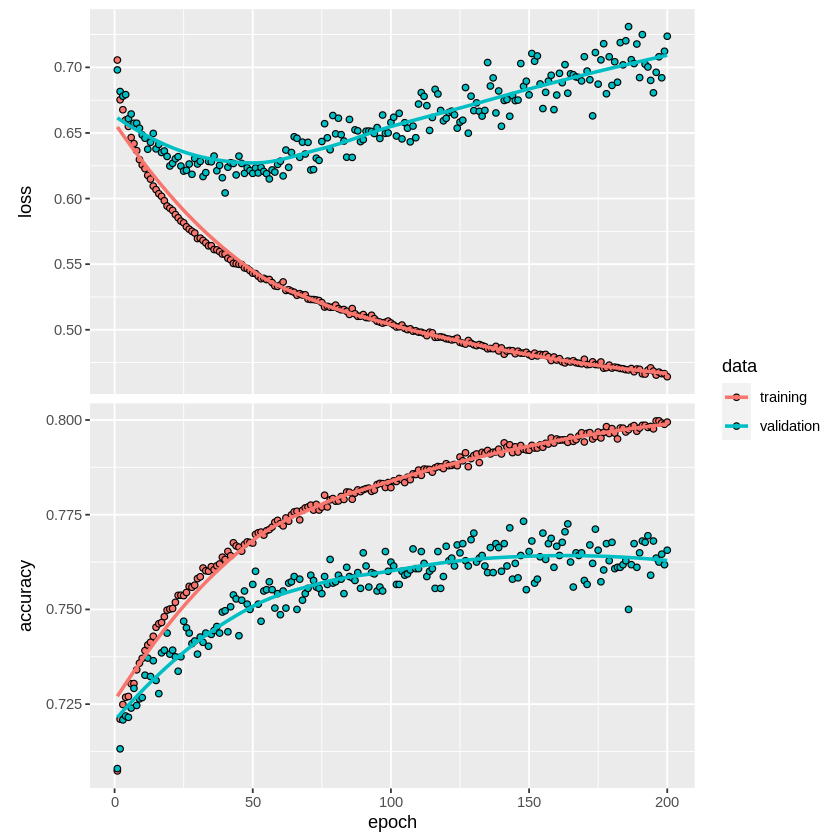

In [176]:
plot(history2)

In [50]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 200, batch_size = 128,
  validation_split = 0.2
)

`geom_smooth()` using formula 'y ~ x'



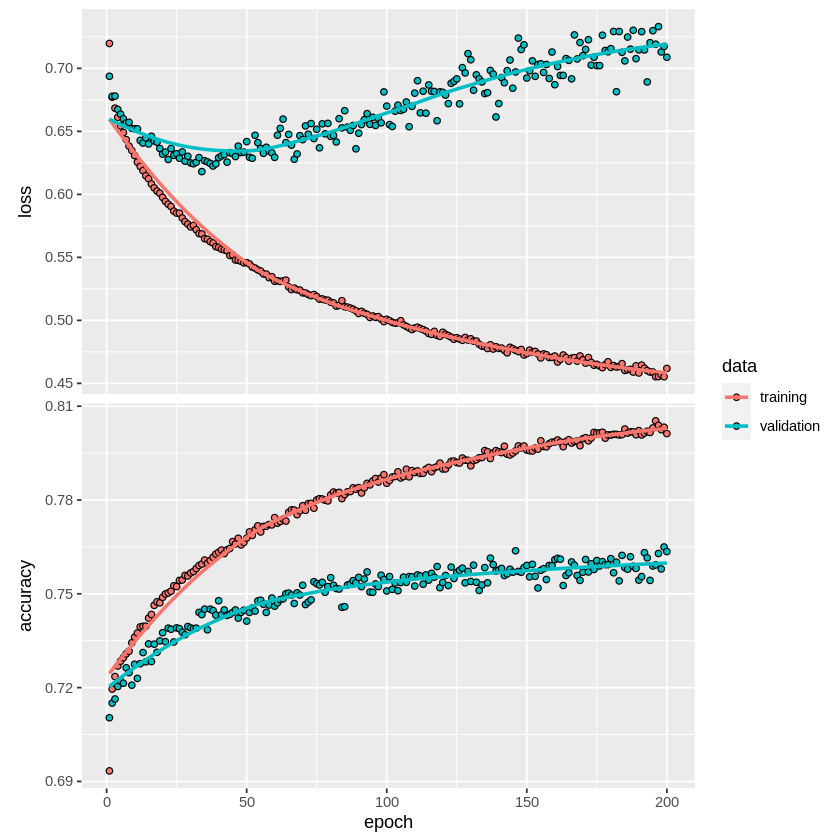

In [51]:
plot(history)

## Predictions testing

In [161]:
testing_df = read.csv("test_data.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",")

In [162]:
drops <- c("installer", "basin", "source", "payment_type", "region", "funder", "date_recorded", "gps_height", "wpt_name", "num_private", "lga", "ward", "subvillage", "region_code", "district_code", "recorded_by", "scheme_name", "waterpoint_type_group", "payment", "management", "management_group", "extraction_type_group", "extraction_type", "quantity_group", "quality_group", "amount_tsh", "population", "public_meeting", "scheme_management", "permit", "source_type", "source_class")
testing_df = testing_df[ , !(names(testing_df) %in% drops)]
testing_df

id,longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type
<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
50785,35.29080,-4.05969643,2012,other,soft,seasonal,other
51630,36.65671,-3.30921425,2000,gravity,soft,insufficient,communal standpipe
17168,34.76786,-5.00434437,2010,other,soft,insufficient,other
45559,38.05805,-9.41867222,1987,other,soft,dry,other
49871,35.00612,-10.95041200,2000,gravity,soft,enough,communal standpipe
52449,36.68528,-3.30242017,1990,gravity,soft,enough,communal standpipe
24806,36.39804,-7.54138236,2007,handpump,salty,enough,hand pump
28965,39.60742,-10.89378645,1982,submersible,soft,dry,communal standpipe multiple
36301,39.26295,-10.82358805,1997,gravity,soft,insufficient,communal standpipe


In [163]:
testing_df <- transform(testing_df, longitude = (longitude - min(longitude)) / (max(longitude) - min(longitude)))
testing_df <- transform(testing_df, latitude = (latitude - min(latitude)) / (max(latitude) - min(latitude)))
testing_df <- transform(testing_df, construction_year = (construction_year - min(construction_year)) / (max(construction_year) - min(construction_year)))

In [164]:
testing_df$construction_year[testing_df$construction_year == 0] <- mean(testing_df$construction_year)
testing_df$quantity[testing_df$quantity == "unknown"]  <- sample(setdiff(unique(testing_df$quantity), c('unknown')))[1]

testing_df$water_quality[testing_df$water_quality == 'unknown'] <- sample(setdiff(unique(testing_df$water_quality), c('unknown')))[1]

In [ ]:
testing_df
#sample(x=as.vector(setdiff(unique(testing_df$water_quality), c('unknown'))), n=1)

In [ ]:
testing_df = dummy.data.frame(testing_df, sep="_")

In [167]:
testing_df_ = testing_df[,2:ncol(testing_df)] #get rid of IDs
target_variables <-c((ncol(testing_df_)-2),(ncol(testing_df_)-1), ncol(testing_df_))
dim(testing_df_)

[1] 14850    28

In [ ]:
Y_pred<-predict(model_nn,testing_df_[,-target_variable])

y_hat_idx = cbind(1:nrow(Y_pred), max.col(Y_pred, 'first'))

In [ ]:
res_df <- data.frame(matrix(ncol = 2, nrow = nrow(testing_df)))
names <- c("id", "status_group")
colnames(res_df) <- names

In [ ]:
for(i in 1:nrow(testing_df)) {
    res_df[i, "id"] = testing_df[i, "id"]
    pred = y_hat_idx[i,2]
    if(pred == 1) {
        res_df[i, "status_group"] = "functional"
    } else if(pred == 2) {
        res_df[i, "status_group"] = "functional needs repair"
    } else {
        res_df[i, "status_group"] = "non functional"
    }
}

In [ ]:
write.csv(res_df, "results.csv", row.names = FALSE)

In [177]:
y_hat_DL <- as.matrix(predict(object = model2, x = as.matrix(testing_df_)))# %>%
y_hat_DL

7.549440e-03,2.501473e-06,9.924481e-01
9.423537e-01,2.223257e-02,3.541376e-02
2.473827e-02,4.331724e-10,9.752617e-01
1.594993e-06,4.342634e-16,9.999985e-01
6.018122e-01,3.753954e-01,2.279237e-02
9.834626e-01,4.217512e-04,1.611568e-02
9.432100e-01,2.286327e-04,5.656138e-02
3.361653e-07,9.299421e-10,9.999996e-01
3.665069e-01,2.986622e-01,3.348309e-01
9.845225e-01,2.977608e-04,1.517973e-02
9.849186e-01,2.801170e-04,1.480128e-02


In [178]:
y_hat_idx = cbind(1:nrow(y_hat_DL), max.col(y_hat_DL, 'first'))

In [179]:
y_hat_idx

1,3
2,1
3,3
4,3
5,1
6,1
7,1
8,3
9,1
10,1
11,1


In [180]:
res_df <- data.frame(matrix(ncol = 2, nrow = nrow(testing_df)))
names <- c("id", "status_group")
colnames(res_df) <- names

In [181]:
for(i in 1:nrow(testing_df)) {
    res_df[i, "id"] = testing_df[i, "id"]
    pred = y_hat_idx[i,2]
    if(pred == 1) {
        res_df[i, "status_group"] = "functional"
    } else if(pred == 2) {
        res_df[i, "status_group"] = "functional needs repair"
    } else {
        res_df[i, "status_group"] = "non functional"
    }
}

In [182]:
write.csv(res_df, "results.csv", row.names = FALSE)

# Conclusions